In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

%matplotlib inline
pd.set_option('display.max.row', None)
pd.set_option('display.max.column', None)

In [2]:
#reading the file
df = pd.read_csv(r'C:\Users\Emma\Desktop\data.csv')

In [3]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [4]:
df.isnull().sum()

bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64

In [5]:
df.shape

(202, 29)

In [6]:
df.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,202,202
unique,3,4,6,6,3,3,7,3,3,3,11,9,10,8,5,11,11,10,10,3,3,3,3,3,3,12,6,4,12
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,37.4 - 41.3,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,79,108,92,159,197,49,56,96,98,122,130,178,160,165,168,68,54,128,48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc      

In [8]:
df = df.drop([0, 1]).reset_index(drop=True)

In [ ]:

print
(
df['sg'].value_counts(),
df['al'].value_counts(),
df['class'].value_counts(),
df['rbc'].value_counts(),
df['su'].value_counts(),
df['pc'].value_counts(),
df['pcc'].value_counts(),
df['ba'].value_counts(),
df['bgr'].value_counts(),
df['bu'].value_counts(),
df['sod'].value_counts(),
df['sc'].value_counts(),
df['pot'].value_counts(),
df['hemo'].value_counts(),
df['pcv'].value_counts(),
df['rbcc'].value_counts(),
df['wbcc'].value_counts(),
df['htn'].value_counts(),
df['dm'].value_counts(),
df['cad'].value_counts(),
df['appet'].value_counts(),
df['pe'].value_counts(),
df['ane'].value_counts(),
df['grf'].value_counts(),
df['stage'].value_counts(),
df['age'].value_counts(),
)


## visualizing some categorical variables

<Axes: xlabel='class', ylabel='count'>

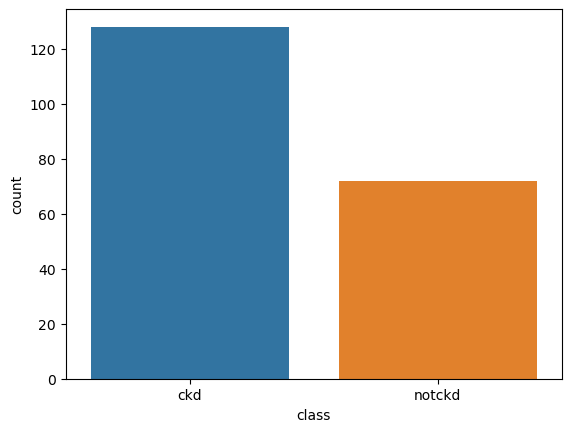

In [9]:
sns.countplot(x = 'class', data = df)

<Axes: xlabel='age', ylabel='count'>

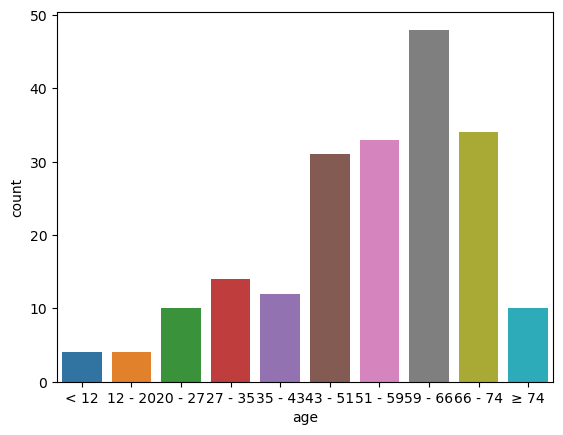

In [10]:
sns.countplot(x = 'age', data = df)

<Axes: xlabel='stage', ylabel='count'>

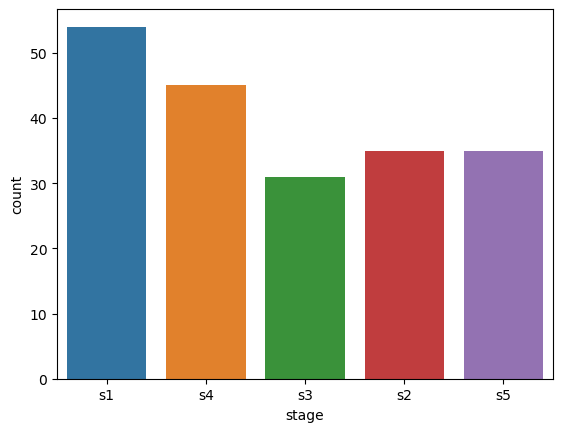

In [11]:
sns.countplot(x = 'stage', data = df)

## Label Encoding

In [12]:
encode = LabelEncoder()

In [13]:
columns_to_encode = ['sg', 'al', 'class', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo','pcv','rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age']
# Loop through each column and encode
for col in columns_to_encode:
    df[col] = encode.fit_transform(df[col])


In [14]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,2,0,0,0,4,0,0,0,8,6,4,5,2,1,4,3,5,0,0,0,0,0,0,10,0,1,8
1,0,0,0,3,0,0,4,0,0,0,0,6,3,5,2,1,4,3,0,0,0,0,0,0,0,10,0,1,8
2,0,0,0,4,0,1,4,1,0,1,8,4,3,5,2,7,3,3,1,0,0,0,1,0,0,2,0,1,8
3,1,1,0,2,0,0,4,0,0,0,0,6,3,5,2,3,6,3,5,0,0,0,0,0,0,2,0,1,8
4,0,0,1,3,0,0,4,0,0,0,1,6,3,5,2,3,5,4,5,0,1,0,1,1,0,2,0,1,0


In [15]:
df.describe()

,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.795000,2.365000,0.360000,0.125000,3.640000,0.22500,0.135000,0.055000,3.580000,4.82500,3.530000,4.445000,1.99000,3.325000,4.860000,3.115000,4.715000,0.390000,0.350000,0.110000,0.200000,0.175000,0.160000,6.515000,1.860000,5.055000
std,1.372001,1.126106,0.481205,0.331549,0.977331,0.41863,0.342581,0.228552,3.648308,1.68182,1.259776,1.214227,0.17335,2.833641,2.164213,1.470574,1.375951,0.488974,0.478167,0.313675,0.401004,0.380921,0.367526,2.642858,1.473518,2.059901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,4.00000,3.000000,5.000000,2.00000,1.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,4.000000
50%,2.000000,3.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,2.000000,6.00000,3.000000,5.000000,2.00000,3.000000,5.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,5.000000
75%,2.000000,3.000000,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,8.000000,6.00000,4.000000,5.000000,2.00000,6.000000,6.000000,4.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,3.000000,6.000000
max,4.000000,4.000000,1.000000,1.000000,5.000000,1.00000,1.000000,1.000000,9.000000,7.00000,8.000000,6.000000,3.00000,9.000000,9.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,4.000000,9.000000


In [16]:
# separating the faeture and target 
x = df.drop(['class','affected'], axis = 1)
y = df['affected']

In [17]:
#spliting into training data and testing data
x_test,x_train,y_test,y_train = train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape,x_test.shape,x_train.shape)

(200, 27) (160, 27) (40, 27)


In [18]:
#Training the model
classifier = svm.SVC(kernel = 'linear')

In [19]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [20]:
# model evaluation
x_prediction = classifier.predict(x_train)

In [21]:
# accuracy score
train_accuracy = accuracy_score(x_prediction, y_train)

In [22]:
print('Accuracy Score of training data:', train_accuracy)

Accuracy Score of training data: 1.0


In [23]:
# test score
x_prediction = classifier.predict(x_test)

In [24]:
test_accuracy = accuracy_score(x_prediction, y_test)

In [25]:
print('Accuracy Score of testing data:', test_accuracy)

Accuracy Score of testing data: 0.95


### Predicting a new data

In [34]:
input_data = (1,0,1,1,0,1,3,0,1,0,7,4,2,3,0,0,2,1,3,1,1,0,0,1,0,8,0)

In [35]:
input_data = np.array(input_data).reshape(1, -1)

In [36]:
prediction = classifier.predict(input_data)
print(prediction)

if prediction[0] == 0:
   print('Positive to CKD')
else:
   print('Negative to CKD')


['1']
Negative to CKD


C:\Users\Emma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
